In [119]:
import pandas as pd 
import numpy as np 
import requests
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [120]:
water = pd.read_csv(r"C:\Users\blang\Desktop\data\Water_FINAL.csv", low_memory=False)

In [121]:
water.head(3)

,Unnamed: 0,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,FlowStage,GaugeHeight,GroupCode,HUC12,Lab,Latitude,Layer,Longitude,LowerPycnocline,MeasureValue,Method,ModifiedDate,Other Comments,Other Conditions,Parameter,ParameterName_CBP,ParameterName_CMC,PrecipType,PrecisionPC,Pressure,Problem,Program,Project,Qualifier,Rainfall,Rainfall Within 24 Hours,Rainfall Within 48 Hours,SampleDepth,SampleId,SampleReplicateType,SampleType,Sea State,Source,Station,StationCode,StationName,Stream Flow,Tidal Stage,TideStage,TierLevel,Time,TotalDepth,Unit,UpperPycnocline,Water Color,Water Color Description,Water Odor,Water Odor Description,Water Surfaces,WaveHeight,Weather Conditions Day Before Yesterday,Weather Conditions Today,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
0,0,2143,NaN,NaN,NaN,NaN,NaN,CMC,04/28/2018,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.480194,NaN,-75.930028,NaN,14.970,NaN,2020-04-25T17:31:58.767,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT01,FOB BT01,NaN,Outgoing (Ebb),NaN,p2,12:05:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,W,1-10 knots,MD,POINT (-75.93002800000002 39.480194),20600020206,Bohemia River,24015,Cecil County,MD
1,1,2145,NaN,NaN,NaN,NaN,NaN,CMC,04/28/2018,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.480444,NaN,-75.902528,NaN,20.002,NaN,2020-04-25T17:31:59.173,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT02,FOB BT02,NaN,Outgoing (Ebb),NaN,p2,12:40:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,W,1-10 knots,MD,POINT (-75.902528 39.480444),20600020206,Bohemia River,24015,Cecil County,MD
2,2,2147,NaN,NaN,NaN,NaN,NaN,CMC,04/28/2018,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.466889,NaN,-75.873639,NaN,26.204,NaN,2020-04-25T17:31:59.36,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT03,FOB BT03,NaN,Outgoing (Ebb),NaN,p2,13:13:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,S,1-10 knots,MD,POINT (-75.873639 39.466889),20600020206,Bohemia River,24015,Cecil County,MD


In [122]:
water.shape

(2708717, 73)

In [123]:
water.describe()

,Unnamed: 0,Unnamed: 0.1,FieldActivityRemark,GaugeHeight,HUC12,Latitude,Longitude,LowerPycnocline,MeasureValue,PrecisionPC,Pressure,SampleDepth,SampleId,TotalDepth,UpperPycnocline,HUC12_,FIPS_
count,2.708717e+06,2.708717e+06,0.0,99773.000000,2.444456e+06,2.708717e+06,2.708717e+06,424435.000000,2.708717e+06,0.0,74079.000000,2.704881e+06,2.708717e+06,2.105652e+06,424435.000000,2.708717e+06,2.708717e+06
mean,1.354358e+06,2.214989e+06,NaN,10.861847,2.070009e+10,3.843319e+01,-7.658405e+01,11.318739,1.490216e+01,NaN,754.894667,4.147473e+00,2.044871e+05,1.149991e+01,6.650813,2.069454e+10,3.578554e+04
std,7.819394e+05,1.525271e+06,NaN,353.141177,9.915505e+07,1.000394e+00,6.551539e-01,5.302668,7.579417e+01,NaN,28.707134,5.776304e+00,1.856555e+05,9.183738e+00,3.276481,1.031873e+08,1.344905e+04
min,0.000000e+00,0.000000e+00,NaN,-0.290000,2.040303e+10,3.674004e+01,-8.043708e+01,0.700000,-1.400000e+01,NaN,1.000000,-1.000000e-01,1.000000e+00,0.000000e+00,0.000000,2.040303e+10,1.000100e+04
25%,6.771790e+05,8.509090e+05,NaN,2.210000,2.060002e+10,3.763189e+01,-7.686761e+01,7.000000,1.000400e+00,NaN,751.000000,5.000000e-01,3.035200e+04,3.700000e+00,4.500000,2.060002e+10,2.401900e+04
50%,1.354358e+06,2.185441e+06,NaN,3.210000,2.070011e+10,3.839600e+01,-7.640131e+01,10.500000,7.700000e+00,NaN,758.000000,1.250000e+00,1.070730e+05,1.000000e+01,6.500000,2.070010e+10,2.404100e+04
75%,2.031537e+06,3.530615e+06,NaN,5.190000,2.080105e+10,3.899748e+01,-7.617466e+01,14.500000,1.333000e+01,NaN,763.000000,6.000000e+00,4.139770e+05,1.600000e+01,8.500000,2.080105e+10,5.110100e+04
max,2.708716e+06,4.897264e+06,NaN,35500.000000,2.080208e+10,4.280672e+01,-7.483524e+01,30.500000,2.977700e+04,NaN,787.000000,3.600000e+01,4.620910e+05,1.530000e+02,21.500000,2.080208e+10,5.407100e+04


In [124]:
water.isnull().sum().sort_values(ascending=False)

FieldActivityRemark                        2708717
PrecisionPC                                2708717
BiasPC                                     2708662
Other Conditions                           2704336
Weather Conditions Day Before Yesterday    2704250
Rainfall Within 24 Hours                   2703385
Sea State                                  2703287
FlowStage                                  2702786
Weather Conditions Yesterday               2699754
Rainfall                                   2688370
Other Comments                             2687940
Water Odor Description                     2687625
Rainfall Within 48 Hours                   2682090
Problem                                    2678579
Stream Flow                                2677661
Water Odor                                 2676199
Water Color                                2675841
Water Surfaces                             2656405
Tidal Stage                                2644517
Water Color Description        

In [125]:
water.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Agency', 'BiasPC', 'CloudCover',
       'Comments', 'Cruise', 'Database', 'Date', 'FieldActivityEventType',
       'FieldActivityRemark', 'FlowStage', 'GaugeHeight', 'GroupCode', 'HUC12',
       'Lab', 'Latitude', 'Layer', 'Longitude', 'LowerPycnocline',
       'MeasureValue', 'Method', 'ModifiedDate', 'Other Comments',
       'Other Conditions', 'Parameter', 'ParameterName_CBP',
       'ParameterName_CMC', 'PrecipType', 'PrecisionPC', 'Pressure', 'Problem',
       'Program', 'Project', 'Qualifier', 'Rainfall',
       'Rainfall Within 24 Hours', 'Rainfall Within 48 Hours', 'SampleDepth',
       'SampleId', 'SampleReplicateType', 'SampleType', 'Sea State', 'Source',
       'Station', 'StationCode', 'StationName', 'Stream Flow', 'Tidal Stage',
       'TideStage', 'TierLevel', 'Time', 'TotalDepth', 'Unit',
       'UpperPycnocline', 'Water Color', 'Water Color Description',
       'Water Odor', 'Water Odor Description', 'Water Surfaces', 'WaveHeight',


In [126]:
water.dtypes

Unnamed: 0                                   int64
Unnamed: 0.1                                 int64
Agency                                      object
BiasPC                                      object
CloudCover                                  object
Comments                                    object
Cruise                                      object
Database                                    object
Date                                        object
FieldActivityEventType                      object
FieldActivityRemark                        float64
FlowStage                                   object
GaugeHeight                                float64
GroupCode                                   object
HUC12                                      float64
Lab                                         object
Latitude                                   float64
Layer                                       object
Longitude                                  float64
LowerPycnocline                

In [127]:
water.corr()

,Unnamed: 0,Unnamed: 0.1,FieldActivityRemark,GaugeHeight,HUC12,Latitude,Longitude,LowerPycnocline,MeasureValue,PrecisionPC,Pressure,SampleDepth,SampleId,TotalDepth,UpperPycnocline,HUC12_,FIPS_
Unnamed: 0,1.000000,0.998553,NaN,-0.040381,0.298180,-0.329649,0.083214,-0.090599,-0.088303,NaN,-0.022908,0.085760,0.785288,-0.026273,-0.037498,0.322880,0.222767
Unnamed: 0.1,0.998553,1.000000,NaN,-0.040466,0.299979,-0.322212,0.077162,-0.091501,-0.078388,NaN,-0.022954,0.078546,0.786957,-0.025697,-0.037826,0.323685,0.228391
FieldActivityRemark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GaugeHeight,-0.040381,-0.040466,NaN,1.000000,-0.041491,0.037855,0.025046,NaN,0.006487,NaN,0.034302,-0.012405,-0.034746,0.652829,NaN,-0.048833,-0.011884
HUC12,0.298180,0.299979,NaN,-0.041491,1.000000,-0.815971,-0.013970,-0.294375,-0.019937,NaN,0.019609,-0.003987,-0.023646,-0.141261,-0.095724,0.994069,0.704461
Latitude,-0.329649,-0.322212,NaN,0.037855,-0.815971,1.000000,-0.178337,0.146907,0.100956,NaN,-0.085630,-0.202919,-0.053118,-0.036430,0.015467,-0.816430,-0.530178
Longitude,0.083214,0.077162,NaN,0.025046,-0.013970,-0.178337,1.000000,-0.110102,-0.037015,NaN,0.215923,0.252691,0.018969,0.198714,-0.011990,-0.018672,-0.135438
LowerPycnocline,-0.090599,-0.091501,NaN,NaN,-0.294375,0.146907,-0.110102,1.000000,0.034099,NaN,NaN,0.355084,-0.011581,0.731700,0.521236,-0.294375,-0.244751
MeasureValue,-0.088303,-0.078388,NaN,0.006487,-0.019937,0.100956,-0.037015,0.034099,1.000000,NaN,-0.022273,-0.042184,-0.053216,-0.004438,0.022551,-0.062916,0.012934
PrecisionPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


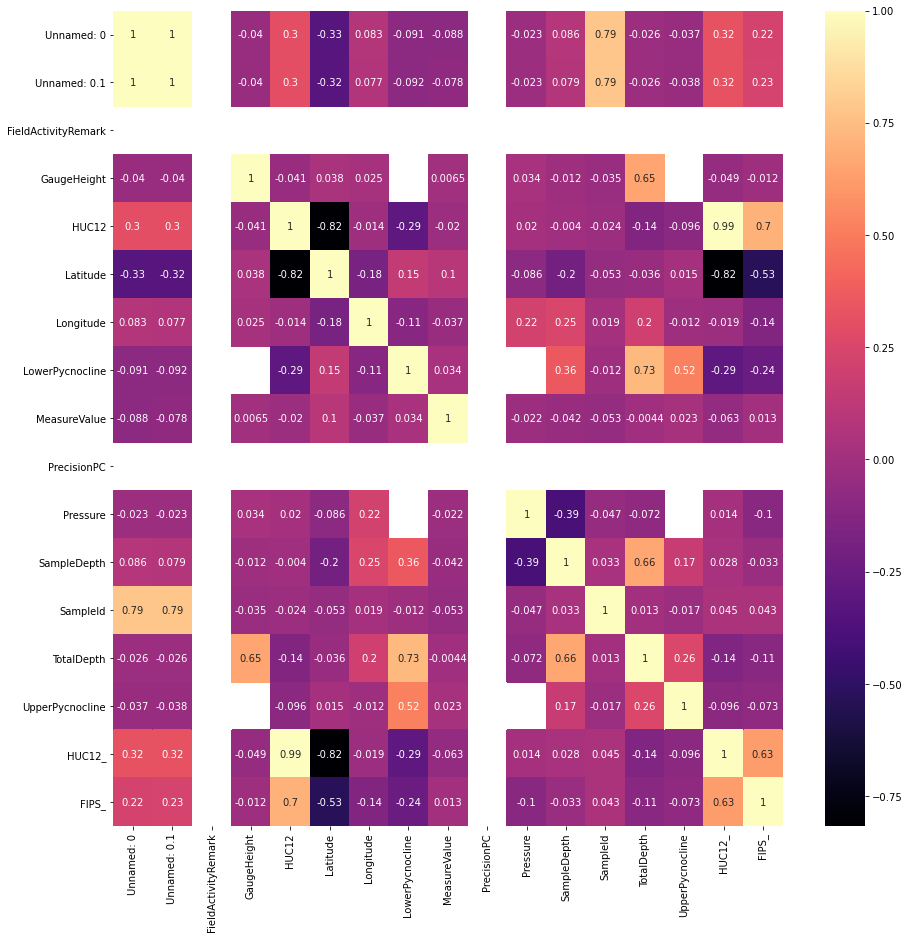

In [128]:
plt.figure(figsize=(15,15))
sns.heatmap(water.corr(), annot=True, cmap='magma')

In [129]:
water.sort_values(by='Date').head()

,Unnamed: 0,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,FlowStage,GaugeHeight,GroupCode,HUC12,Lab,Latitude,Layer,Longitude,LowerPycnocline,MeasureValue,Method,ModifiedDate,Other Comments,Other Conditions,Parameter,ParameterName_CBP,ParameterName_CMC,PrecipType,PrecisionPC,Pressure,Problem,Program,Project,Qualifier,Rainfall,Rainfall Within 24 Hours,Rainfall Within 48 Hours,SampleDepth,SampleId,SampleReplicateType,SampleType,Sea State,Source,Station,StationCode,StationName,Stream Flow,Tidal Stage,TideStage,TierLevel,Time,TotalDepth,Unit,UpperPycnocline,Water Color,Water Color Description,Water Odor,Water Odor Description,Water Surfaces,WaveHeight,Weather Conditions Day Before Yesterday,Weather Conditions Today,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
184927,184927,2,NaN,NaN,NaN,NaN,NaN,CMC,01/01/1993,NaN,NaN,NaN,NaN,LRA,NaN,NaN,40.17667,NaN,-77.18507,NaN,5.90,NaN,2017-10-27T14:48:28.053,NaN,NaN,NO3N.3,NITRATE NITROGEN AS N (FILTERED SAMPLE),Nitrate-nitrogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,LRA.LT2,LT2,NaN,NaN,NaN,2.0,12:00:00,NaN,mg/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-77.18507 40.17667),20503050404,Letort Spring Run,42041,Cumberland County,PA
77688,77688,0,NaN,NaN,NaN,NaN,NaN,CMC,01/01/1993,NaN,NaN,NaN,NaN,LRA,NaN,NaN,40.17663,NaN,-77.18537,NaN,9.50,NaN,2017-10-27T14:48:27.897,NaN,NaN,WT.10,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,LRA.LT1,LT1,NaN,NaN,NaN,1.0,12:00:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-77.18536999999998 40.17663),20503050404,Letort Spring Run,42041,Cumberland County,PA
77689,77689,1,NaN,NaN,NaN,NaN,NaN,CMC,01/01/1993,NaN,NaN,NaN,NaN,LRA,NaN,NaN,40.23487,NaN,-77.14193,NaN,8.00,NaN,2017-10-27T14:48:30.1,NaN,NaN,WT.10,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,LRA.LT10,LT10,NaN,NaN,NaN,1.0,12:00:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-77.14193 40.23487),20503050404,Letort Spring Run,42041,Cumberland County,PA
77690,77690,2,NaN,NaN,NaN,NaN,NaN,CMC,01/01/1993,NaN,NaN,NaN,NaN,LRA,NaN,NaN,40.17667,NaN,-77.18507,NaN,8.85,NaN,2017-10-27T14:48:28.053,NaN,NaN,WT.10,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,LRA.LT2,LT2,NaN,NaN,NaN,1.0,12:00:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-77.18507 40.17667),20503050404,Letort Spring Run,42041,Cumberland County,PA
77691,77691,3,NaN,NaN,NaN,NaN,NaN,CMC,01/01/1993,NaN,NaN,NaN,NaN,LRA,NaN,NaN,40.17999,NaN,-77.18692,NaN,9.25,NaN,2017-10-27T14:48:28.287,NaN,NaN,WT.10,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,LRA.LT3,LT3,NaN,NaN,NaN,1.0,12:00:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-77.18692 40.17999),20503050404,Letort Spring Run,42041,Cumberland County,PA


In [130]:
water.sort_values(by='Date').tail()

,Unnamed: 0,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,FlowStage,GaugeHeight,GroupCode,HUC12,Lab,Latitude,Layer,Longitude,LowerPycnocline,MeasureValue,Method,ModifiedDate,Other Comments,Other Conditions,Parameter,ParameterName_CBP,ParameterName_CMC,PrecipType,PrecisionPC,Pressure,Problem,Program,Project,Qualifier,Rainfall,Rainfall Within 24 Hours,Rainfall Within 48 Hours,SampleDepth,SampleId,SampleReplicateType,SampleType,Sea State,Source,Station,StationCode,StationName,Stream Flow,Tidal Stage,TideStage,TierLevel,Time,TotalDepth,Unit,UpperPycnocline,Water Color,Water Color Description,Water Odor,Water Odor Description,Water Surfaces,WaveHeight,Weather Conditions Day Before Yesterday,Weather Conditions Today,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
2331006,2331006,4135280,MDDNR,NaN,Partly To Broken (50-90%),NaN,BAY752,CBP,9/9/2019,NaN,NaN,NaN,NaN,NaN,2.070002e+10,MDHMH,39.58268,S,-78.73145,NaN,0.006,L01,NaN,NaN,NaN,PO4F,ORTHOPHOSPHATE PHOSPHORUS AS P (FILTERED SAMPLE),NaN,NaN,NaN,NaN,NaN,NTWQM,NTID,NaN,NaN,NaN,NaN,0.0,458855.0,S1,D,NaN,MDDNR,NBP0103,NaN,NaN,NaN,NaN,NaN,T3,11:51:00,NaN,MG/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.73145 39.58268),20700020801,Collier Run-North Branch Potomac River,24001,Allegany County,MD
2331007,2331007,4135282,MDDNR,NaN,Partly To Broken (50-90%),NaN,BAY752,CBP,9/9/2019,NaN,NaN,NaN,NaN,NaN,2.070002e+10,NaN,39.58268,S,-78.73145,NaN,0.000,F01,NaN,NaN,NaN,SALINITY,SALINITY UNITS IN PPT AND EQUAL TO PRACTICAL S...,NaN,NaN,NaN,NaN,NaN,NTWQM,NTID,NaN,NaN,NaN,NaN,0.0,458855.0,M1,ISM,NaN,MDDNR,NBP0103,NaN,NaN,NaN,NaN,NaN,T3,11:51:00,NaN,PPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.73145 39.58268),20700020801,Collier Run-North Branch Potomac River,24001,Allegany County,MD
2331008,2331008,4135286,MDDNR,NaN,Partly To Broken (50-90%),NaN,BAY752,CBP,9/9/2019,NaN,NaN,NaN,NaN,NaN,2.070002e+10,MDHMH,39.58268,S,-78.73145,NaN,57.000,L01,NaN,NaN,NaN,TALK,TOTAL ALKALINITY AS CACO3,NaN,NaN,NaN,NaN,NaN,NTWQM,NTID,NaN,NaN,NaN,NaN,0.0,458855.0,S1,D,NaN,MDDNR,NBP0103,NaN,NaN,NaN,NaN,NaN,T3,11:51:00,NaN,MG/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.73145 39.58268),20700020801,Collier Run-North Branch Potomac River,24001,Allegany County,MD
2329808,2329808,4132310,MDDNR,NaN,Overcast (>90%),NaN,BAY752,CBP,9/9/2019,NaN,NaN,NaN,NaN,NaN,2.070002e+10,NaN,39.66185,S,-78.78029,NaN,0.070,F01,NaN,NaN,NaN,SALINITY,SALINITY UNITS IN PPT AND EQUAL TO PRACTICAL S...,NaN,NaN,NaN,NaN,NaN,NTWQM,NTID,NaN,NaN,NaN,NaN,0.0,458893.0,M1,ISM,NaN,MDDNR,WIL0013,NaN,NaN,NaN,NaN,NaN,T3,10:47:00,NaN,PPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.78029000000002 39.66185),20700020507,Braddock Run-Wills Creek,24001,Allegany County,MD
2371841,2371841,4229797,MDDNR,NaN,Partly To Broken (50-90%),NaN,BAY752,CBP,9/9/2019,NaN,NaN,NaN,NaN,NaN,2.070010e+10,MDHMH,38.70664,M,-77.04876,NaN,16.000,L01,NaN,NaN,NaN,TURB_NTU,TURBIDITY; NEPHELOMETRIC METHOD,NaN,NaN,NaN,NaN,NaN,TWQM,TRIB,NaN,NaN,NaN,NaN,9.1,458888.0,S1,D,NaN,MDDNR,TF2.1,NaN,NaN,NaN,NaN,Ebb Tide,T3,11:28:00,19.0,NTU,NaN,NaN,NaN,NaN,NaN,NaN,0.0 to <0.1M,NaN,NaN,NaN,NaN,0 To 1 Knot,NaN,POINT (-77.04876 38.70664),20700100307,Little Hunting Creek-Potomac River,24033,Prince George's County,MD


In [131]:
HUC12_quality = pd.read_csv(r"C:\Users\blang\Desktop\data\WaterQualityWaterQualityHUC12.csv", low_memory=False)

In [132]:
HUC12_quality.head()

,HUC12,EventId,Cruise,Program,Project,Agency,Source,Station,SampleDate,SampleTime,TotalDepth,UpperPycnocline,LowerPycnocline,Depth,Layer,SampleType,SampleReplicateType,Parameter,Qualifier,MeasureValue,Unit,Method,Lab,Problem,PrecisionPC,BiasPC,Details,Latitude,Longitude,TierLevel
0,020403030303,447731.0,BAY706,SWM,CMON,MDDNR,MDDNR,XDN6921,10/2/2017,10:45:00,0.6,NaN,NaN,0.3,BS,D,S1,CHLA,NaN,41.919,UG/L,L01,CBL,NaN,NaN,NaN,NaN,38.44902,-75.13245,T3
1,020403030303,457963.0,BAY753,SWM,CMON,MDDNR,MDDNR,XDN6921,9/20/2019,11:15:00,0.8,NaN,NaN,0.5,BS,D,S1,CHLA,NaN,9.612,UG/L,L01,CBL,NaN,NaN,NaN,NaN,38.44902,-75.13245,T3
2,020403030303,460495.0,BAY754,SWM,CMON,MDDNR,MDDNR,XDN6921,10/2/2019,10:45:00,0.7,NaN,NaN,0.4,BS,D,S1,CHLA,NaN,15.664,UG/L,L01,CBL,NaN,NaN,NaN,NaN,38.44902,-75.13245,T3
3,020403030303,422233.0,BAY674,SWM,CMON,MDDNR,MDDNR,XDN6921,6/8/2016,11:00:00,0.8,NaN,NaN,0.5,BS,D,S1,CHLA,NaN,40.584,UG/L,L01,CBL,NaN,NaN,NaN,NaN,38.44902,-75.13245,T3
4,020403030303,457020.0,BAY748,SWM,CMON,MDDNR,MDDNR,XDN6921,7/9/2019,11:45:00,0.6,NaN,NaN,0.3,BS,D,S1,CHLA,NaN,80.634,UG/L,L01,CBL,NaN,NaN,NaN,NaN,38.44902,-75.13245,T3


In [133]:
HUC12_quality.columns

Index(['HUC12', 'EventId', 'Cruise', 'Program', 'Project', 'Agency', 'Source',
       'Station', 'SampleDate', 'SampleTime', 'TotalDepth', 'UpperPycnocline',
       'LowerPycnocline', 'Depth', 'Layer', 'SampleType',
       'SampleReplicateType', 'Parameter', 'Qualifier', 'MeasureValue', 'Unit',
       'Method', 'Lab', 'Problem', 'PrecisionPC', 'BiasPC', 'Details',
       'Latitude', 'Longitude', 'TierLevel'],
      dtype='object')

In [134]:
HUC12_quality.shape

(1341305, 30)

In [135]:
FIPS_quality = pd.read_csv(r"C:/Users/blang/Desktop/data/WaterQualityWaterQualityFIPS.csv", low_memory=False)

In [136]:
FIPS_quality.head()

,FIPS,EventId,Cruise,Program,Project,Agency,Source,Station,SampleDate,SampleTime,TotalDepth,UpperPycnocline,LowerPycnocline,Depth,Layer,SampleType,SampleReplicateType,Parameter,Qualifier,MeasureValue,Unit,Method,Lab,Problem,PrecisionPC,BiasPC,Details,Latitude,Longitude,TierLevel
0,10001,429922.0,NTN017,NTWQM,NTN,DEDNREC,DEDNREC,302031,2/21/2017,08:57:00,NaN,NaN,NaN,0.0,VH,HVIC,S1,CHLA,NaN,4.97,UG/L,L03,DEDNREC,NaN,NaN,NaN,NaN,38.84972,-75.67333,T3
1,10001,429923.0,NTN017,NTWQM,NTN,DEDNREC,DEDNREC,302031,3/15/2017,09:24:00,NaN,NaN,NaN,0.0,VH,HVIC,S1,CHLA,NaN,3.88,UG/L,L03,DEDNREC,NaN,NaN,NaN,NaN,38.84972,-75.67333,T3
2,10001,429924.0,NTN017,NTWQM,NTN,DEDNREC,DEDNREC,302031,3/21/2017,08:52:00,NaN,NaN,NaN,0.0,VH,HVIC,S1,CHLA,NaN,2.55,UG/L,L03,DEDNREC,NaN,NaN,NaN,NaN,38.84972,-75.67333,T3
3,10001,429925.0,NTN017,NTWQM,NTN,DEDNREC,DEDNREC,302031,4/18/2017,08:33:00,NaN,NaN,NaN,0.0,VH,HVIC,S1,CHLA,NaN,8.96,UG/L,L03,DEDNREC,NaN,NaN,NaN,NaN,38.84972,-75.67333,T3
4,10001,429926.0,NTN017,NTWQM,NTN,DEDNREC,DEDNREC,302031,5/9/2017,09:08:00,NaN,NaN,NaN,0.0,VH,HVIC,S1,CHLA,NaN,3.02,UG/L,L03,DEDNREC,NaN,NaN,NaN,NaN,38.84972,-75.67333,T3


In [137]:
FIPS_quality.shape

(1362191, 30)

In [138]:
FIPS_quality.columns

Index(['FIPS', 'EventId', 'Cruise', 'Program', 'Project', 'Agency', 'Source',
       'Station', 'SampleDate', 'SampleTime', 'TotalDepth', 'UpperPycnocline',
       'LowerPycnocline', 'Depth', 'Layer', 'SampleType',
       'SampleReplicateType', 'Parameter', 'Qualifier', 'MeasureValue', 'Unit',
       'Method', 'Lab', 'Problem', 'PrecisionPC', 'BiasPC', 'Details',
       'Latitude', 'Longitude', 'TierLevel'],
      dtype='object')

In [139]:
FIPS_quality['MeasureValue']

0           4.97
1           3.88
2           2.55
3           8.96
4           3.02
           ...  
1362186    14.10
1362187     5.30
1362188     4.40
1362189     3.70
1362190      NaN
Name: MeasureValue, Length: 1362191, dtype: float64

In [140]:
monitor_HUC12 = pd.read_csv(r"C:/Users/blang/Desktop/data/WaterQualityMonitorEventHUC12.csv", low_memory=False)

In [141]:
monitor_HUC12

,HUC12,EventId,Cruise,Program,Project,Agency,Source,Station,SampleDate,SampleTime,TotalDepth,UpperPycnocline,LowerPycnocline,FieldActivityEventType,FieldActivityRemark,WindSpeed,WindDirection,PrecipType,TideStage,WaveHeight,CloudCover,Pressure,GaugeHeight,FlowStage,Details,Latitude,Longitude,TierLevel
0,020600050506,400795.0,BAY654,SWM,CMON,MDDNR,MDDNR,XFG2810,8/10/2015,09:30:00,3.5,NaN,NaN,NaN,NaN,>1 To 10 Knots,S,NaN,Flood Tide,0.1 to <0.3M,Overcast (>90%),NaN,NaN,NaN,NaN,38.71252,-76.31680,NaN
1,020600050506,400797.0,BAY654,SWM,CMON,MDDNR,MDDNR,XFG4618,8/10/2015,10:48:00,2.9,NaN,NaN,NaN,NaN,>1 To 10 Knots,S,NaN,Flood Tide,0.1 to <0.3M,Overcast (>90%),NaN,NaN,NaN,B DATA FRO HYDROLAB; NO YSI TURB OR CHL DATA,38.74323,-76.30338,NaN
2,020600050506,400799.0,BAY654,SWM,CMON,MDDNR,MDDNR,XFG6431,8/10/2015,10:15:00,3.5,NaN,NaN,NaN,NaN,>1 To 10 Knots,S,NaN,Flood Tide,0.0 to <0.1M,Overcast (>90%),NaN,NaN,NaN,NaN,38.77315,-76.28230,NaN
3,020801020104,416219.0,BAY654,SWM,CMON,VADEQ,VIMS,DIV000.41,8/10/2015,09:15:00,1.5,NaN,NaN,NaN,NaN,0 To 1 Knot,NNW,Drizzle,Ebb Tide,0.0 to <0.1M,Overcast (>90%),NaN,NaN,NaN,NaN,37.73362,-76.32336,NaN
4,020801020105,416302.0,BAY654,SWM,CMON,VADEQ,VIMS,IND000.02,8/10/2015,08:21:00,1.6,NaN,NaN,NaN,NaN,>1 To 10 Knots,NNW,None,Ebb Tide,0.0 to <0.1M,Overcast (>90%),NaN,NaN,NaN,NaN,37.67835,-76.32758,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24748,020700060503,461833.0,NTN020,NTWQM,NTN,VADEQ,USGSVA,1BNFS010.34,3/19/2020,10:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,756.0,2.21,NaN,CIMS Event =R CIMS remark = NF Routine Sample...,38.97644,-78.33633,NaN
24749,020700051004,461843.0,NTN020,NTWQM,NTN,VADEQ,USGSVA,1BSSF003.56,3/19/2020,12:15:00,NaN,NaN,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755.0,1.71,NaN,CIMS Event = R CIMS remark = NF Routine Samp...,38.91361,-78.20972,NaN
24750,020801020204,461910.0,NTN020,NTWQM,NTN,VADEQ,USGSVA,7-DRN010.48,3/24/2020,10:00:00,NaN,NaN,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769.0,5.18,NaN,CIMS Event = R CIMS remark = NF Routine Samp...,37.63361,-76.69583,NaN
24751,020801050301,461929.0,NTN020,NTWQM,NTN,VADEQ,USGSVA,8-PCT000.76,3/24/2020,12:00:00,NaN,NaN,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,768.0,2.76,NaN,CIMS Event = R CIMS remark =NF Routine Sampl...,37.96028,-77.34361,NaN


In [142]:
monitor_HUC12.dtypes

HUC12                      object
EventId                   float64
Cruise                     object
Program                    object
Project                    object
Agency                     object
Source                     object
Station                    object
SampleDate                 object
SampleTime                 object
TotalDepth                float64
UpperPycnocline           float64
LowerPycnocline           float64
FieldActivityEventType     object
FieldActivityRemark       float64
WindSpeed                  object
WindDirection              object
PrecipType                 object
TideStage                  object
WaveHeight                 object
CloudCover                 object
Pressure                  float64
GaugeHeight               float64
FlowStage                 float64
Details                    object
Latitude                  float64
Longitude                 float64
TierLevel                 float64
dtype: object

In [143]:
temp = water[water['Parameter'] == 'WTEMP']['MeasureValue']

In [144]:
temp[:10]

264272    29.1
264279    32.0
264286    33.6
264298    13.6
264310    15.2
264322    20.1
264329    17.5
264336    18.5
264348    12.0
264360    15.0
Name: MeasureValue, dtype: float64

In [145]:
temp2 = water[water['Parameter'] == 'WTEMP']
temp2[:10]

,Unnamed: 0,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,FlowStage,GaugeHeight,GroupCode,HUC12,Lab,Latitude,Layer,Longitude,LowerPycnocline,MeasureValue,Method,ModifiedDate,Other Comments,Other Conditions,Parameter,ParameterName_CBP,ParameterName_CMC,PrecipType,PrecisionPC,Pressure,Problem,Program,Project,Qualifier,Rainfall,Rainfall Within 24 Hours,Rainfall Within 48 Hours,SampleDepth,SampleId,SampleReplicateType,SampleType,Sea State,Source,Station,StationCode,StationName,Stream Flow,Tidal Stage,TideStage,TierLevel,Time,TotalDepth,Unit,UpperPycnocline,Water Color,Water Color Description,Water Odor,Water Odor Description,Water Surfaces,WaveHeight,Weather Conditions Day Before Yesterday,Weather Conditions Today,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
264272,264272,29,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY509,CBP,7/22/2009,NaN,NaN,NaN,NaN,NaN,2.040303e+10,NaN,38.44902,BS,-75.13245,NaN,29.1,F01,NaN,NaN,NaN,WTEMP,WATER TEMPERATURE DEG,NaN,NaN,NaN,NaN,NaN,SWM,CMON,NaN,NaN,NaN,NaN,0.5,106165.0,M1,ISM,NaN,MDDNR,XDN6921,NaN,NaN,NaN,NaN,Ebb Tide,T3,11:30:00,0.8,DEG C,NaN,NaN,NaN,NaN,NaN,NaN,0.0 to <0.1M,NaN,NaN,NaN,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
264279,264279,50,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY531,CBP,6/22/2010,NaN,NaN,NaN,NaN,NaN,2.040303e+10,NaN,38.44902,BS,-75.13245,NaN,32.0,F01,NaN,NaN,NaN,WTEMP,WATER TEMPERATURE DEG,NaN,NaN,NaN,NaN,NaN,SWM,CMON,NaN,NaN,NaN,NaN,0.1,112549.0,M1,ISM,NaN,MDDNR,XDN6921,NaN,NaN,NaN,NaN,Ebb Tide,T3,11:45:00,0.4,DEG C,NaN,NaN,NaN,NaN,NaN,NaN,0.0 to <0.1M,NaN,NaN,NaN,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
264286,264286,70,MDDNR,NaN,Clear (0-10%),NaN,BAY532,CBP,7/7/2010,NaN,NaN,NaN,NaN,NaN,2.040303e+10,NaN,38.44902,BS,-75.13245,NaN,33.6,F01,NaN,NaN,NaN,WTEMP,WATER TEMPERATURE DEG,NaN,NaN,NaN,NaN,NaN,SWM,CMON,NaN,NaN,NaN,NaN,0.1,112810.0,M1,ISM,NaN,MDDNR,XDN6921,NaN,NaN,NaN,NaN,Ebb Tide,T3,11:30:00,0.4,DEG C,NaN,NaN,NaN,NaN,NaN,NaN,0.0 to <0.1M,NaN,NaN,NaN,E,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
264298,264298,101,MDDNR,NaN,Partly To Broken (50-90%),NaN,BAY492,CBP,11/12/2008,NaN,NaN,NaN,NaN,NaN,2.040303e+10,NaN,38.44902,BS,-75.13245,NaN,13.6,F01,NaN,NaN,NaN,WTEMP,WATER TEMPERATURE DEG,NaN,NaN,NaN,NaN,NaN,SWM,CMON,NaN,NaN,NaN,NaN,0.4,81372.0,M1,ISM,NaN,MDDNR,XDN6921,NaN,NaN,NaN,NaN,Ebb Tide,T3,10:00:00,0.7,DEG C,NaN,NaN,NaN,NaN,NaN,NaN,0.0 to <0.1M,NaN,NaN,NaN,N,0 To 1 Knot,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
264310,264310,131,MDDNR,NaN,Overcast (>90%),NaN,BAY514,CBP,10/15/2009,NaN,NaN,NaN,NaN,NaN,2.040303e+10,NaN,38.44902,BS,-75.13245,NaN,15.2,F01,NaN,NaN,NaN,WTEMP,WATER TEMPERATURE DEG,NaN,NaN,NaN,NaN,NaN,SWM,CMON,NaN,NaN,NaN,NaN,0.5,93090.0,M1,ISM,NaN,MDDNR,XDN6921,NaN,NaN,NaN,NaN,Ebb Tide,T3,11:45:00,0.8,DEG C,NaN,NaN,NaN,NaN,NaN,NaN,0.0 to <0.1M,NaN,NaN,NaN,SE,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
264322,264322,161,MDDNR,NaN,Overcast (>90%),NaN,BAY503,CBP,4/29/2009,NaN,NaN,NaN,NaN,NaN,2.040303e+10,NaN,38.44902,BS,-75.13245,NaN,20.1,F01,NaN,NaN,NaN,WTEMP,WATER TEMPERATURE DEG,NaN,NaN,NaN,NaN,NaN,SWM,CMON,NaN,NaN,NaN,NaN,0.1,100049.0,M1,ISM,NaN,MDDNR,XDN6921,NaN,NaN,NaN,NaN,Flood Tide,T3,12:30:00,0.4,DEG C,NaN,NaN,NaN,NaN,NaN,NaN,0.0 to <0.1M,NaN,NaN,NaN,NW,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
264329,264329,182,MDDNR,NaN,Clear (0-10%),NaN,BAY526,CBP,4/14/2010,NaN,NaN,NaN,NaN,NaN,2.040303e+10,NaN,38.44902,BS,-75.13245,NaN,17.5,F01,NaN,NaN,NaN,WTEMP,WATER TEMPERATURE DEG,NaN,NaN,NaN,NaN,NaN,SWM,CMON,NaN,NaN,NaN,NaN,0.1,111757.0,M1,ISM,NaN,MDDNR,

In [146]:
water['Parameter'].value_counts()

WTEMP       388565
PH          386401
DO          385581
SALINITY    357455
TSS         127039
PO4F        117433
NO3F        114998
NH4F        111666
TP          111608
TN          109500
CHLA         98506
SECCHI       52179
TURB_NTU     39300
TALK         22331
DO.2         14777
TKNW         14257
CO.1         11794
WT.3         11760
PH.4         10779
TDS.1        10156
DO.1          9430
PH.3          9010
WT.10         8763
DO.3          8651
SA.3          8437
TDS           7637
WC.4          7620
PH.1          5469
DO.4          5207
PH.9          5115
TD.1          5052
PH.7          4964
AT.6          4802
CO.5          4634
WT.4          4616
DO.5          4602
WC.6          4421
WT.1          4299
WT.2          4151
AT.2          4072
NO3N.1        3706
WT.6          3673
ALKY.3        3623
ECOLI.1       3454
CHL.1         3326
NO3N.3        3257
WC.5          3198
OP.3          3126
DO.9          3080
DO.6          3050
CO.8          2978
SA.6          2925
WC.1        

In [147]:
benthic_df = pd.read_csv(r"C:\Users\blang\Desktop\data\Benthic_Stream_Health.csv", low_memory=False)

In [148]:
benthic_df

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,sample_date,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
0,0,74228_1,74228,1,napu,BNTY005.7-4176,7/26/2006,50.326099,good,41.94361,-76.71500,CBP,SRBC,20501050602,Middle Bentley Creek,42015,PA,Bradford County
1,1,74231_1,74231,1,napu,BNTY002.5-4176,7/26/2006,56.969635,good,41.98583,-76.72278,CBP,SRBC,20501050603,Lower Bentley Creek,42015,PA,Bradford County
2,2,74233_1,74233,1,napu,BNTY000.4-4276,7/26/2006,53.735738,good,42.01194,-76.73139,CBP,SRBC,20501050603,Lower Bentley Creek,36015,NY,Chemung County
3,3,74236_1,74236,1,napu,SOUT009.1-4176,7/26/2006,53.302979,good,41.95472,-76.79222,CBP,SRBC,20501050506,South Creek,42015,PA,Bradford County
4,4,74334_1,74334,1,napu,MEHO001.5-4176,6/23/2008,55.619394,good,41.56000,-76.06778,CBP,SRBC,20501060903,Lower Mehoopany Creek,42131,PA,Wyoming County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,7368,95745_1,95745,1,pied,J06018,3/25/2011,28.190242,very_poor,37.45992,-78.15132,CBP,VCU/LHL,20802070405,Little Guinea Creek-Appomattox River,51049,VA,Cumberland County
7369,7369,95746_1,95746,1,pied,J06013,3/25/2011,35.767173,poor,37.41385,-78.14244,CBP,VCU/LHL,20802070406,Stock Creek,51007,VA,Amelia County
7370,7370,95747_1,95747,1,pied,J06010,3/25/2011,19.833402,very_poor,37.37977,-78.22224,CBP,VCU/LHL,20802070403,Sandy Creek-Appomattox River,51007,VA,Amelia County
7371,7371,95752_1,95752,1,pied,2BXAD000.07,3/28/2011,53.603058,poor,37.74580,-78.49090,CBP,VADEQ,20802031104,Little George Creek-James River,51029,VA,Buckingham County


In [149]:
benthic_df['sample_date'].min(), benthic_df['sample_date'].max()

('10/1/2006', '9/9/2017')

In [150]:
cmc_benthic = pd.read_csv(r"C:\Users\blang\Desktop\data\BenthicSamples.csv", low_memory=False)

In [151]:
cmc_benthic

,DateTime,Date,Time,StationCode,StationName,GroupName,Latitude,Longitude,Benthic Classification Name,Benthic Classification Code,Count,Comments,Active Construction,Algae Color,Algae Located,Aquatic Veg/Decaying Matter,Area 1 Sampled,Area 2 Sampled,Area 3 Sampled,Area 4 Sampled,Barriers To Fish Movement,Bottom Type,Channel Width,Collection Time (Net 1),Collection Time (Net 2),Collection Time (Net 3),Collection Time (Net 4),Cropland,Define Other Bank Composition,Define Other Land Use,Define Other Organism,Describe the Amount and Type of Litter,Discharge Pipes,Fields,Fish Water Quality Indicators,Forest,Housing Development,Indicate Current and Potential Threats,Livestock Pasture,Logging,Mining,Number of Discharge Pipes,Number of Squirts,Odor,Oil and Gas Drilling,Other Land Use,Percent Algae,Percent Bare Soil,Percent Boulders,Percent Cobbles,Percent Grass,Percent Gravel,Percent Other,Percent Rocks,Percent Sand,Percent Shrubs,Percent Silt,Percent Trees,Precipitation,Sanitary Landfill,Silt/Sand/Gravel,Snags/Logs Jabs,Snags/Logs,Stability of Stream,Stream Bed Deposit,Stream Channel Erosion,Stream Channel Shade,Stream Flow,Surface Water Appearance,Trash Dump,Type of Cropland,Type of Mining,Type of Pipes,Urban Uses,Vegetated Jabs,Vegetated,Weather Conditions,Weather Last 72 Hours
0,2016-01-03T12:00:00,01/03/2016,12:00:00,VSOS.09-PL30-Acc-ACC9,09-PL30-Acc-ACC9,Virginia Save Our Streams,38.853300,-77.245600,Dragonflies and Damselflies,DD,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rocky,NaN,21-89,21-89,21-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cool and dry
1,2016-01-03T12:00:00,01/03/2016,12:00:00,VSOS.09-PL30-Acc-ACC9,09-PL30-Acc-ACC9,Virginia Save Our Streams,38.853300,-77.245600,Scuds,SC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rocky,NaN,21-89,21-89,21-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cool and dry
2,2016-01-03T12:00:00,01/03/2016,12:00:00,VSOS.09-PL30-Acc-ACC9,09-PL30-Acc-ACC9,Virginia Save Our Streams,38.853300,-77.245600,Flatworms,F,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rocky,NaN,21-89,21-89,21-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cool and dry
3,2016-01-03T12:00:00,01/03/2016,12:00:00,VSOS.09-PL30-Acc-ACC9,09-PL30-Acc-ACC9,Virginia Save Our Streams,38.853300,-77.245600,Most True Flies,MTF,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rocky,NaN,21-89,21-89,21-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cool and dry
4,2016-01-03T12:00:00,01/03/2016,12:00:00,VSOS.09-PL30-Acc-ACC9,09-PL30-Acc-ACC9,Virginia Save Our Streams,38.853300,-77.245600,Clams,CL,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rocky,NaN,21-89,21-89,21-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cool and dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19478,2015-12-31T12:00:00,12/31/2015,12:00:00,"ANS.Site 14, Dayspring Creek","Site 14, Dayspring Creek",Audubon Naturalist Society,39.203214,-77.229881,AGRIIDAE,CALOPTERYGIDAE,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [152]:
cmc_benthic.columns

Index(['DateTime', 'Date', 'Time', 'StationCode', 'StationName', 'GroupName',
       'Latitude', 'Longitude', 'Benthic Classification Name',
       'Benthic Classification Code', 'Count', 'Comments',
       'Active Construction', 'Algae Color', 'Algae Located',
       'Aquatic Veg/Decaying Matter', 'Area 1 Sampled', 'Area 2 Sampled',
       'Area 3 Sampled', 'Area 4 Sampled', 'Barriers To Fish Movement',
       'Bottom Type', 'Channel Width', 'Collection Time (Net 1)',
       'Collection Time (Net 2)', 'Collection Time (Net 3)',
       'Collection Time (Net 4)', 'Cropland', 'Define Other Bank Composition',
       'Define Other Land Use', 'Define Other Organism',
       'Describe the Amount and Type of Litter', 'Discharge Pipes', 'Fields',
       'Fish Water Quality Indicators', 'Forest', 'Housing Development',
       'Indicate Current and Potential Threats', 'Livestock Pasture',
       'Logging', 'Mining', 'Number of Discharge Pipes', 'Number of Squirts',
       'Odor', 'Oil and Gas Dr

In [153]:
cmc_benthic.isna().sum().sort_values(ascending = False)

In [154]:
benthic_df['rating'][:10]

0    good
1    good
2    good
3    good
4    good
5    good
6    good
7    good
8    good
9    good
Name: rating, dtype: object

In [155]:
water['Date'] = pd.to_datetime(water['Date'])

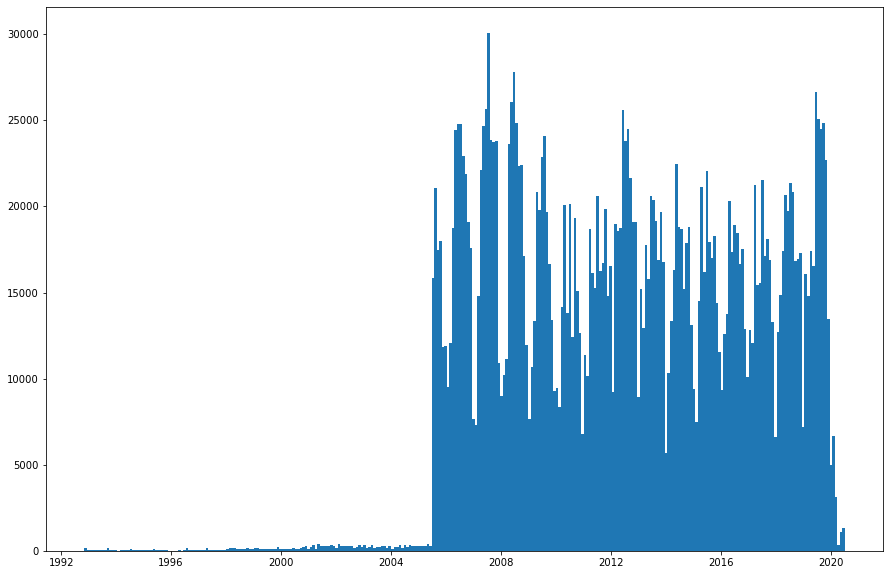

In [156]:
fig, ax = plt.subplots(figsize=(15,10))
hist = ax.hist(water['Date'], bins=300)
plt.show()

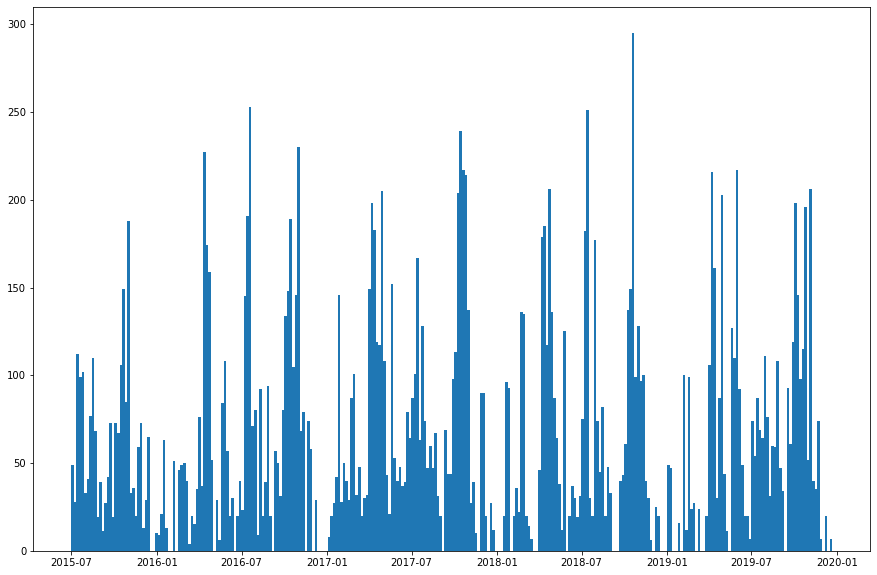

In [159]:
cmc_benthic['DateTime'] = pd.to_datetime(cmc_benthic['DateTime'])
fig, ax = plt.subplots(figsize=(15,10))
hist = ax.hist(cmc_benthic['DateTime'], bins=300)
plt.show()